<a href="https://colab.research.google.com/github/smbillah/ist526/blob/main/experimental_starter_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Essential Libraries

In [2]:
# python visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px
%matplotlib inline

import pandas as pd
import numpy as np

import plotly.express as px

# Load Data from GitHub

In [3]:
# ref: https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url

# iris data
# url = 'https://raw.githubusercontent.com/smbillah/ist526/main/iris.csv'

#  sample data 
url = 'https://raw.githubusercontent.com/smbillah/ist526/main/liver_dataset.csv'

# pandas call to read csv file 
df = pd.read_csv(url)

# quickly show the dataframe
df.head()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,dummy_label
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,1
2,86,54,33,16,54,0.0,1
3,91,78,34,24,36,0.0,1
4,87,70,12,28,10,0.0,1


In [ ]:
# it's a good idea to peek at the tail too. 
# Note, we need display(.) function if more than output is printed
display(df.head())
display(df.tail())

# get column names
display(df.columns)

,mcv,alkphos,sgpt,sgot,gammagt,drinks,dummy_label
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,1
2,86,54,33,16,54,0.0,1
3,91,78,34,24,36,0.0,1
4,87,70,12,28,10,0.0,1


,mcv,alkphos,sgpt,sgot,gammagt,drinks,dummy_label
340,99,75,26,24,41,12.0,1
341,96,69,53,43,203,12.0,1
342,98,77,55,35,89,15.0,1
343,91,68,27,26,14,16.0,1
344,98,99,57,45,65,20.0,1


Index(['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks', 'dummy_label'], dtype='object')

# Use Seaborn Library
http://seaborn.pydata.org/examples/index.html

In [ ]:
# we already imported seaborn library in the first cell. Doing it again to emphasis.
import seaborn as sns

## Create a distrubtion/histogram

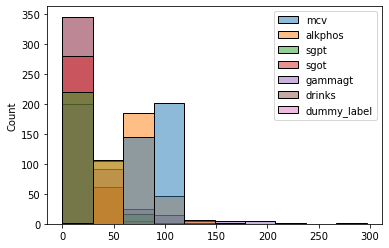

In [ ]:
# for all attributes
sns.histplot(df, bins = 10)
plt.show()

## joint plot

In [ ]:
sns.set_theme(style="darkgrid")

# col names: 'sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety'
# class label: 'variety'
sns.jointplot(df, x = 'petal.length', y = 'petal.width', color="m", kind= 'scatter', hue='variety')
plt.show()


In [ ]:
# density
sns.jointplot(data = df, x = 'petal.length', y = 'petal.width', color="m", kind= 'kde', hue='variety')
plt.show()



In [ ]:
sns.jointplot(data = df, x = 'petal.length', y = 'petal.width', color="m", kind= 'hex')
plt.show()



In [ ]:
sns.jointplot(data = df, x = 'petal.length', y = 'petal.width', color="m", kind= 'reg')
plt.show()

## Scatter plot matrix

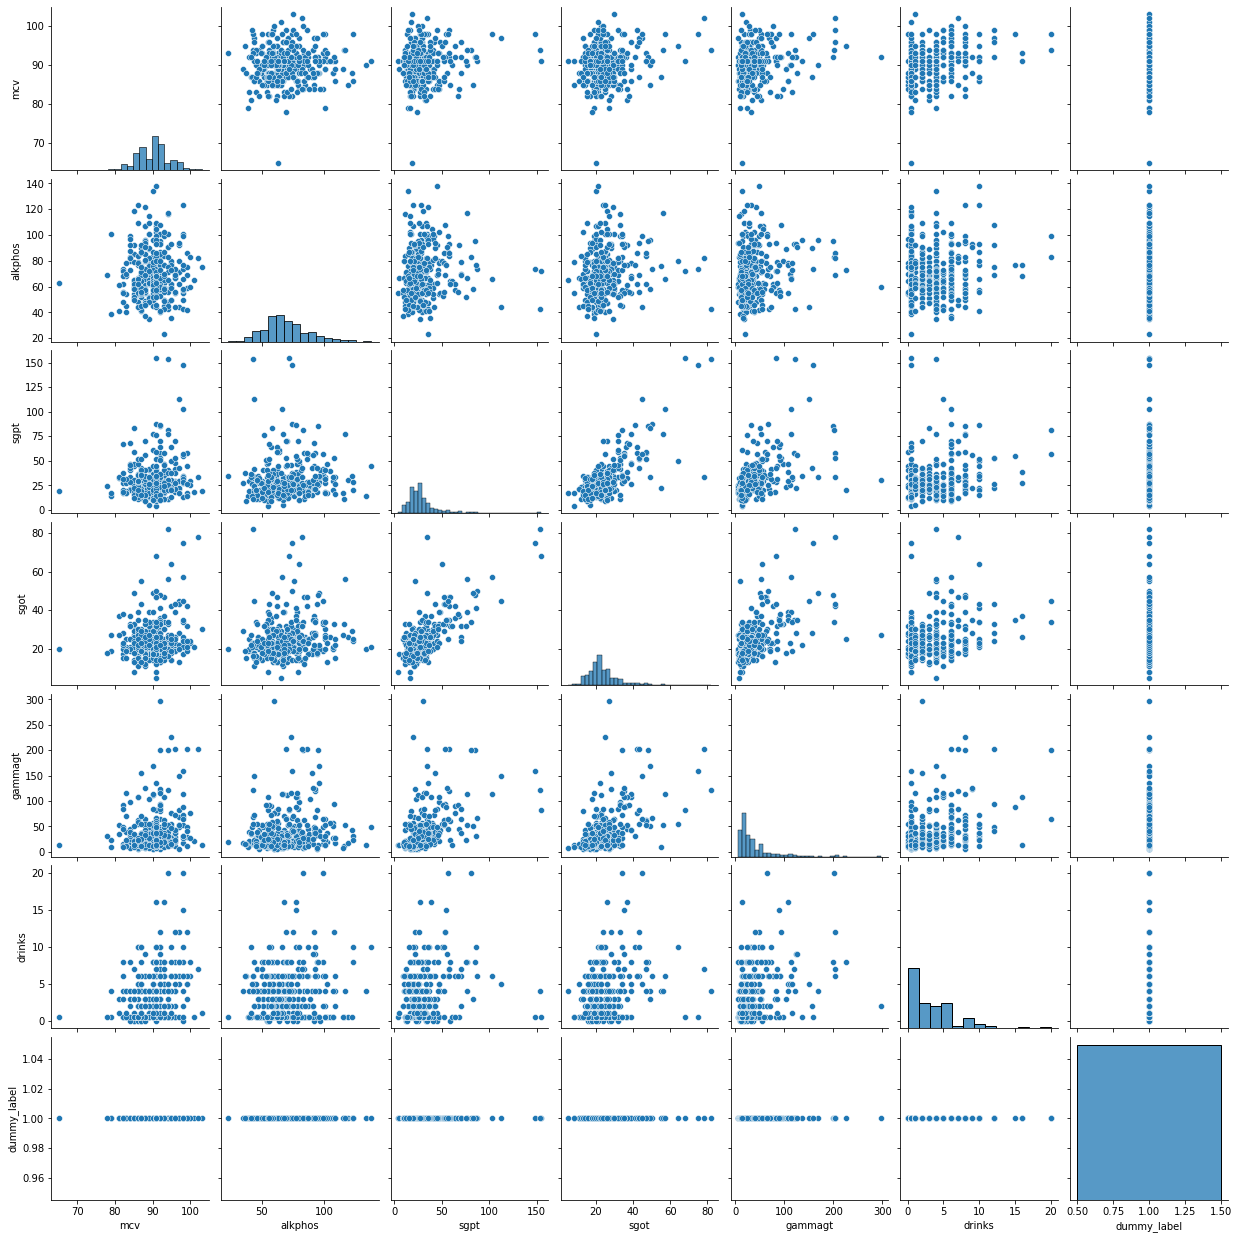

In [ ]:
sns.pairplot(df)
plt.show()

## Scatter plot Grid

In [ ]:
# g = sns.PairGrid(df)
g = sns.PairGrid(df, hue='variety')
g.map(sns.scatterplot)
plt.show()

## Bar chart

In [ ]:
sns.barplot(data = df, x='variety', y='petal.length')
plt.show()

## Count Chart

In [ ]:
sns.countplot(x=df['variety'])
plt.show()

## Box plot

In [ ]:
sns.boxplot(data = df, x = 'variety',  y='petal.length' )
plt.show()

## Correlation Matrix

In [ ]:
df.corr()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,dummy_label
mcv,1.000000,0.044103,0.147695,0.187765,0.222314,0.312680,NaN
alkphos,0.044103,1.000000,0.076208,0.146057,0.133140,0.100796,NaN
sgpt,0.147695,0.076208,1.000000,0.739675,0.503435,0.206848,NaN
sgot,0.187765,0.146057,0.739675,1.000000,0.527626,0.279588,NaN
gammagt,0.222314,0.133140,0.503435,0.527626,1.000000,0.341224,NaN
drinks,0.312680,0.100796,0.206848,0.279588,0.341224,1.000000,NaN
dummy_label,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Heatmap with Correlation Matrix

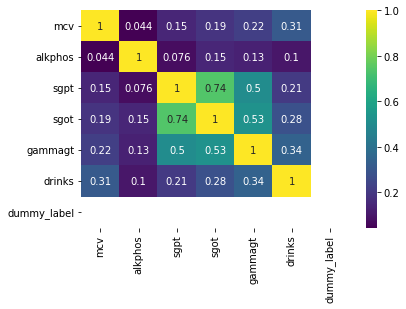

In [ ]:
# 'cmap' stands for color map
sns.heatmap(df.corr(), annot = True, cmap = 'viridis') 
plt.show()

## Showing missing value

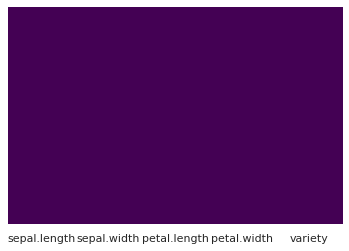

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

## Line plot

In [ ]:
# Plot the responses for different events and regions
sns.lineplot(data = df, x="petal.length", y="petal.width", hue="variety")

# if there is no label in df, remove 'hue' parameter
# sns.lineplot(data = df, x='x', y='y')
plt.show()

## Regression line with error margin

In [ ]:
# Plot the responses for different events and regions
sns.regplot(data = df, x="petal.length", y="petal.width", color='m')
plt.show()

# Use Plotly Express Library: More Powerful than Seaborn

## Scatter plot/ Bubble plot

In [ ]:
import plotly.express as px

# basic scatter plot
fig = px.scatter(df, x="sepal.width", y="sepal.length", color="variety")
fig.show()

### Change the circle size

In [ ]:
# scatter plot: more advanced (change size by petal.length, reduced opacity, added max_size)
fig = px.scatter(df, x="sepal.width", y="sepal.length", size = 'petal.length', opacity = 0.2, size_max=60, color="variety")
fig.show()

## Scatter plot matrix

In [ ]:
import plotly.express as px

# select features/columns 
features = ['petal.length', 'sepal.length', 'petal.width', 'sepal.width']

fig = px.scatter_matrix(
    df,
    dimensions=features,
    color="variety"
)
fig.update_traces(diagonal_visible=False)
fig.show()

## Heatmap/Correlation Plot: Plotly

In [ ]:
## Plotly express does not have a built-in heatmap. 
## But it offers a generic table/cell highlighter, which is more powerful

import plotly.express as px

# it will show the value of Z in a grid
z = [[.1, .3, .5, .7, .9],
     [1, .8, .6, .4, .2],
     [.2, 0, .5, .7, .9],
     [.9, .8, .4, .2, 0],
     [.3, .4, .5, .7, 1]]

fig = px.imshow(z, text_auto=True, aspect="auto")
fig.show()


In [ ]:
## So, if we pass the correlation function, it will display the heatmap

## display(df.corr())
fig = px.imshow(df.corr(), text_auto=True, aspect="auto")

## to disable, text, set 'text_auto=False"
# fig = px.imshow(df.corr(), text_auto=False, aspect="auto")

fig.show()

# PCA on Iris Dataset: Seaborn

In [ ]:
from sklearn.decomposition import PCA
# create X, label from the dataframe. Note that some datasets have no label

# 1. sepatating label (i.e., 'variety') from the dataframe
label = df['variety']

#  removing the column 'variety' to create X
X = df.drop(['variety'], axis= 1)

#print(X.shape, y.shape)

## create PCA model
pca_model = PCA(n_components=2)
reduced_dims = pca_model.fit_transform(X)

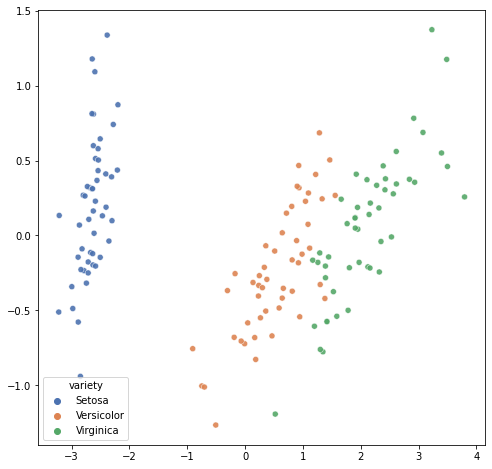

In [ ]:
# visualize low_dimensional data as a scatter plot

# adjust figure's width and height
plt.figure(figsize=(8,8))

## reduced_dims has 2 dimensions (new x, which has index:0; and new y, which has index 1)
sns.scatterplot(x = reduced_dims[:, 0], y = reduced_dims[:, 1], hue=label, alpha=0.9, palette="deep")

# if one dimensional, use y as 0
# sns.scatterplot(x = reduced_dims[:, 0], y = 0, alpha=0.9, palette="deep")
plt.show()

# Parallel Coordinate: Seaborn

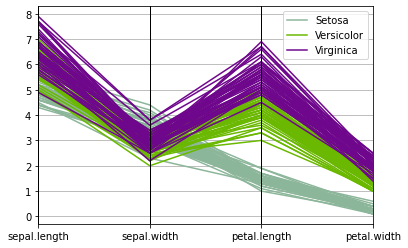

In [ ]:
from pandas.plotting import parallel_coordinates

# default column ordering
pc = parallel_coordinates(df, class_column='variety')
plt.show()

### How to customize column order

In [ ]:
# 1. print all column names
print(df.columns)

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')


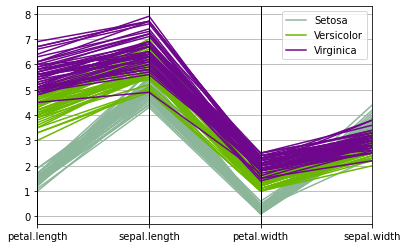

In [ ]:
# create your own column order
# E.g., 'petal.length' and 'sepal.length came first in my list below:
my_col_order = ['petal.length', 'sepal.length', 'petal.width', 'sepal.width', 'variety']

# changing the column order
df_new = df[my_col_order]

# use df_new 
pc = parallel_coordinates(df_new, class_column='variety')
plt.show()

# Parallel Coordinate: Plotly Express

In [ ]:
import plotly.express as px
# no color label
fig = px.parallel_coordinates(df)
fig.show()


### To change column ordering 

In [ ]:
# custom order
my_col_order = ['petal.length', 'sepal.length', 'petal.width', 'sepal.width']

# use dimensions param
fig = px.parallel_coordinates(df, dimensions=my_col_order)
fig.show()

### To add color, convert label column to integer category

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label into integer category
label = le.fit_transform(df['variety'])

my_col_order = ['petal.length', 'sepal.length', 'petal.width', 'sepal.width']

fig = px.parallel_coordinates(df, color = label, dimensions=my_col_order)
fig.show()

# Scagnostic
[library](https://github.com/haishiro/pyscagnostics)

In [ ]:
# installation - run it only once 
!pip install pyscagnostics

     |████████████████████████████████| 794 kB 5.1 MB/s 


In [ ]:
from pyscagnostics import scagnostics
# Simulate data for example

x = np.random.uniform(0, 1, 100)
y = np.random.uniform(0, 1, 100)
z = np.random.uniform(0, 1, 100)
w = np.random.uniform(0, 1, 100)

# put x, y, and z into a pandas dataframe
df_test = pd.DataFrame({
  'x': x,
  'y': y,
  'z': z,
  'w':w
  }
)

display(df_test)

,x,y,z,w
0,0.505362,0.258217,0.337043,0.410640
1,0.823663,0.036566,0.200110,0.546974
2,0.017360,0.634640,0.771834,0.531284
3,0.230334,0.778475,0.070607,0.431952
4,0.302989,0.147338,0.741634,0.785027
...,...,...,...,...
95,0.579342,0.949796,0.235619,0.817177
96,0.851638,0.746647,0.442617,0.803721
97,0.892655,0.523138,0.893319,0.972020
98,0.444448,0.089339,0.049287,0.117750


In [ ]:
# view sgagnostic
results = scagnostics(df_test)

x = None
# read reasults
for i, j, result in results:
  (measures, bins) = result
  print(i, j, measures)
  x = measures

  # break
  #print(i, j, bins)

x y {'Outlying': 0.0, 'Skewed': 0.48947940217173125, 'Clumpy': 0.040431969448165794, 'Sparse': 0.10291873690113693, 'Striated': 0.10204081632653061, 'Convex': 0.6901346971747334, 'Skinny': 0.5175078490298207, 'Stringy': 0.33489797668038407, 'Monotonic': 8.122117660403436e-05}


In [ ]:
import plotly.express as px
data=[[1, 25, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, 5, 20]]
fig = px.imshow(data,
                labels=dict(x="Day of Week", y="Time of Day", color="Productivity"),
                x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
                y=['Morning', 'Afternoon', 'Evening']
               )
fig.update_xaxes(side="top")
fig.show()

# Intro to Python and Pandas Dataframe

## Create a Dummy Data Frame

In [ ]:
# Let's create a dummy data frame with string data
df_dummy = pd.DataFrame({'col1':[1,2,3], 'col2':['a', 'b', 'c'], 'col3':['jack', 'joe', 'jane']})
display(df_dummy.head())
                      

,col1,col2,col3
0,1,a,jack
1,2,b,joe
2,3,c,jane


## Convering string/char columns to categorical

In [ ]:
# convering string/char columns to categorical
df_dummy['col2'] = pd.Categorical(df_dummy['col2'])
display(df_dummy.head())

df_dummy['col3'] = pd.Categorical(df_dummy['col3'])
display(df_dummy.head())

,col1,col2,col3
0,1,a,jack
1,2,b,joe
2,3,c,jane


,col1,col2,col3
0,1,a,jack
1,2,b,joe
2,3,c,jane


Although the above datafram looks identifical, panda internally considers these columns as categorical variable. Many algorithms work with categorical data without any issue. However, if an algorithm expects numeric data, panda could provide numeric codes for these columns. See below.

In [ ]:
df_dummy['col2_code'] = df_dummy.col2.cat.codes
df_dummy['col3_code'] = df_dummy.col3.cat.codes
display(df_dummy.head())

,col1,col2,col3,col2_code,col3_code
0,1,a,jack,0,0
1,2,b,joe,1,2
2,3,c,jane,2,1


So, you can now remove 'col2' and 'col3', and work with 'col2_code' and 'col3_code' instead.

## Remove a column or a set of column

In [ ]:
df_dummy = df_dummy.drop(['col2', 'col3'], axis= 1)
display(df_dummy.head())

,col1,col2_code,col3_code
0,1,0,0
1,2,1,2
2,3,2,1


## Select columns by index

In [ ]:
df_dummy.iloc[0:2]

,col1,col2_code,col3_code
0,1,0,0
1,2,1,2


## [Background] List, Dictionary, and JSON Basics

This question refreshes the concepts of a list, dictionary, and JSON format in Python. There are plenty of online resources (e.g., https://medium.com/analytics-vidhya/python-dictionary-and-json-a-comprehensive-guide-ceed58a3e2ed) on these topics. Feel free to check those out.

**Short version:**

In Python, a square bracket (e.g., ```[..]```) indicates a list, and a curly bracket (e.g., ```{...}``` indicates a dictionary. 

For example, 

```
ages = [23, 21, 40, 43]
student = {'id': 1, 'name': 'jack', 'score': 90}

```
Here, 
* ```ages``` is a list containing 4 elements that are separated by ```,```
* ```student``` is a dictionary that contains 3 key-value pairs, separated by ```,``` 
** A key-value pair looks like ```key```:```value```. Notice that a ```:``` is separating a ```key``` from its ```value```. 

So, the dictionary ```student``` has 3 keys, 'id', 'name', and 'score' with values 1, 'jack', 'score', respectively. 

We can create a list of lists or a list of dictionaries. See the following codes:
```
age_group = [[0, 12], [13, 19], [20,29], [30, 39]]
students = [{'id': 1, 'name': 'jack', 'score': 90}, {'id': 2, 'name': 'nina', 'score': 91}, {'id': 3, 'name': 'robin', 'score': 84}]
```

Here,
* ```age_group``` is a list that contains 4 sub-lists
* ```students``` is a list that contains 3 dictionaries, where each dictionary contains 3 key-value pairs.

**JSON is nothing but a representation of lists and dictionaries in the above format**


# High Dimensional Data Reduction

In [13]:
# ref: https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url

# iris data
# url = 'https://raw.githubusercontent.com/smbillah/ist526/main/iris.csv'

#  sample data 
url = 'https://raw.githubusercontent.com/smbillah/ist526/main/liver_dataset.csv'

# pandas call to read csv file 
df = pd.read_csv(url)

# quickly show the dataframe
df.head()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,dummy_label
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,1
2,86,54,33,16,54,0.0,1
3,91,78,34,24,36,0.0,1
4,87,70,12,28,10,0.0,1


# PCA Demo: Plotly Express

In [14]:
import plotly.express as px
from sklearn.decomposition import PCA

# create X, label from the dataframe. Note that some datasets have no label

# 1. sepatating label (i.e., 'variety') from the dataframe
label = df['dummy_label']

#  removing the column 'variety' to create X
X = df.drop(['dummy_label'], axis= 1)

#print(X.shape, y.shape)

## create PCA model
pca_model = PCA(n_components=2)
reduced_dims_pca = pca_model.fit_transform(X)

## note that parameters 'x' and 'y' indciate axis reference in 'reduced_dims' data
# fig = px.scatter(reduced_dims, x=0, y=1, color=label)

## if you dataset has no label, remove 'color' parameter
fig1 = px.scatter(reduced_dims_pca, x=0, y=1)
fig1.show()

# MDS Demo: Plotly Express

In [15]:
from sklearn.manifold import MDS

## 1. create X, label from the dataframe. Note that some datasets have no label
# 1.1 sepatating label (i.e., 'variety') from the dataframe
label = df['dummy_label']

# 1.2 removing the column 'variety' to create X
X = df.drop(['dummy_label'], axis= 1)

#print(X.shape, y.shape)

## 2. create a model

# Be very careful about 'dissimilarity' parameter
#mds_model = MDS(n_components=2, dissimilarity='precomputed')
mds_model = MDS(n_components=2, dissimilarity='euclidean')

# run MDS
reduced_dims_mds = mds_model.fit_transform(X)

## note that parameters 'x' and 'y' indciate axis reference in 'reduced_dims' data
# fig = px.scatter(reduced_dims, x=0, y=1, color=label)

## if you dataset has no label, remove 'color' parameter
fig2 = px.scatter(reduced_dims_mds, x=0, y=1)

# show it
fig2.show()

# t-SNE Demo: Plotly Express

In [16]:
from sklearn.manifold import TSNE

## 1. create X, label from the dataframe. Note that some datasets have no label
# 1.1 sepatating label (i.e., 'variety') from the dataframe
label = df['dummy_label']

# 1.2 removing the column 'variety' to create X
X = df.drop(['dummy_label'], axis= 1)

#print(X.shape, y.shape)

## 2. create a model

# Be very careful about 'perplexity' and 'metric' parameters
#tsne_model = TSNE(n_components=2, random_state=0, metric='precomputed', perplexity = 20 ) # 
tsne_model = TSNE(n_components=2, random_state=0, metric='euclidean', perplexity = 50) 


# run t-SNE
reduced_dims_tsne = tsne_model.fit_transform(X)

## note that parameters 'x' and 'y' indciate axis reference in 'reduced_dims' data
# fig = px.scatter(reduced_dims, x=0, y=1, color=label)

## if you dataset has no label, remove 'color' parameter
fig3 = px.scatter(reduced_dims_tsne, x=0, y=1)

# show it
fig3.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



# Visualize all

In [25]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# set rows and columns
fig = make_subplots(rows=3, cols=1)


# # go.scatter(reduced_dims_tsne[], x=0, y=1) 

# fig.add_trace(go.Scatter(x = reduced_dims_pca[:,0], y = reduced_dims_pca[:,1]), row=1, col=1)
# fig.add_trace(go.Scatter(x = reduced_dims_mds[:,0], y = reduced_dims_mds[:,1]), row=2, col=1)
# fig.add_trace(go.Scatter(x = reduced_dims_tsne[:,0], y = reduced_dims_tsne[:,1]), row=3, col=1)
# # fig.add_trace(fig2, row=2, col=1)
# # fig.add_trace(fig3, row=3, col=1)

# fig.update_layout(height=1800, width=600, title_text="All")
# fig.show()
# print()